In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
train = pd.read_csv("train_big_mart.csv")
test = pd.read_csv("test_big_mart.csv")

In [3]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
train.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [9]:
train['Outlet_Identifier'].describe()

count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object

In [10]:
train['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

Text(0.5, 1.0, 'Outlet_Size')

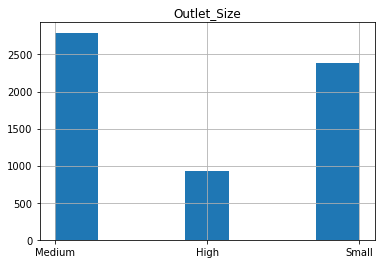

In [11]:
train['Outlet_Size'].hist(bins= 7)
plt.title("Outlet_Size")

In [18]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace = True)
train['Outlet_Size'].fillna('Medium',inplace=True)

In [19]:
train['Outlet_Size'].describe()

count       8523
unique         3
top       Medium
freq        5203
Name: Outlet_Size, dtype: object

In [81]:
price_by_item = train.groupby('Item_Type').Item_MRP.mean()[:10]

In [82]:
sales_by_outlet_size = train.groupby('Outlet_Size').Item_Outlet_Sales.mean()

In [83]:
sales_by_outlet_size.sort_values(inplace= True)

In [84]:
price_by_item

Item_Type
Baking Goods             126.380766
Breads                   140.952669
Breakfast                141.788151
Canned                   139.763832
Dairy                    148.499208
Frozen Foods             138.503366
Fruits and Vegetables    144.581235
Hard Drinks              137.077928
Health and Hygiene       130.818921
Household                149.424753
Name: Item_MRP, dtype: float64

In [90]:
sales_by_outlet_size

Outlet_Size
Small     1912.149161
Medium    2283.730470
High      2298.995256
Name: Item_Outlet_Sales, dtype: float64

In [91]:
a = sales_by_outlet_size.index.tolist()
b = sales_by_outlet_size.values.tolist()

In [92]:
x = price_by_item.index.tolist()
y = price_by_item.values.tolist()

<BarContainer object of 3 artists>

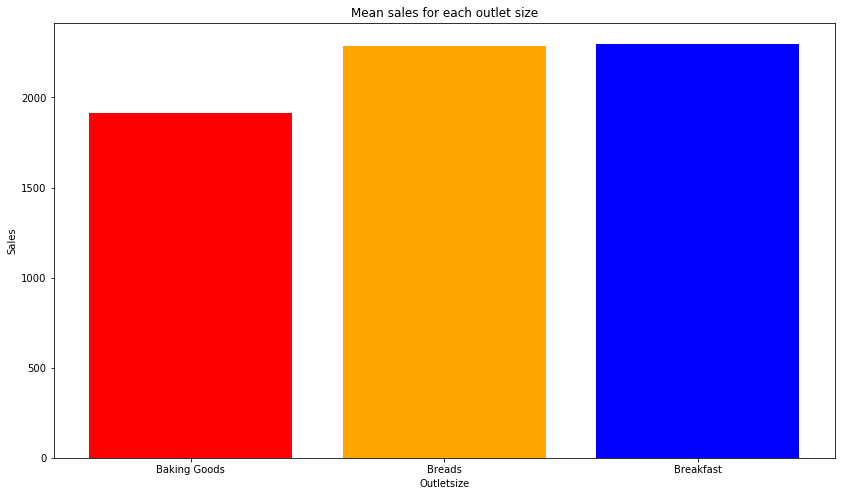

In [93]:
plt.figure(figsize=(14, 8))
plt.title("Mean sales for each outlet size")
plt.xlabel('Outletsize')
plt.ylabel('Sales')
plt.xticks(labels = x, ticks=np.arange(len(x)))
plt.bar(a,b, color = ['red','orange','blue'])

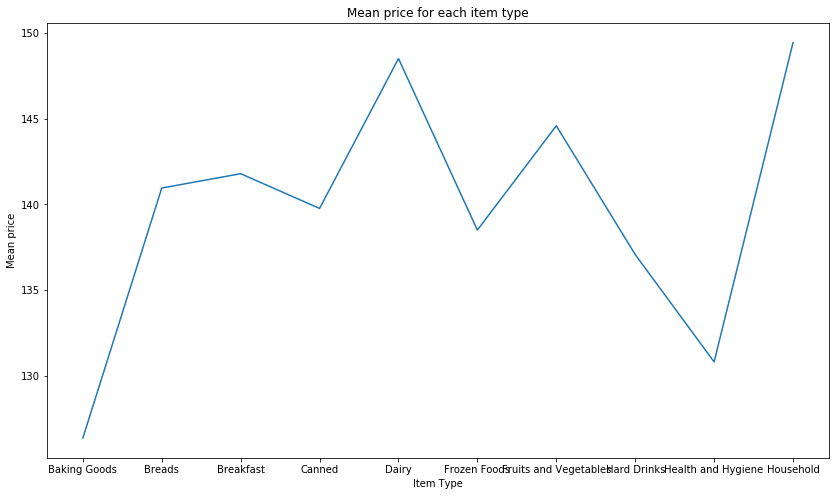

In [94]:
plt.figure(figsize=(14, 8))
plt.title("Mean price for each item type")
plt.xlabel('Item Type')
plt.ylabel('Mean price')
plt.xticks(labels = x, ticks=np.arange(len(x)))
plt.plot(x,y)

In [20]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
train.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

Text(0.5, 1.0, 'Outlet_Size')

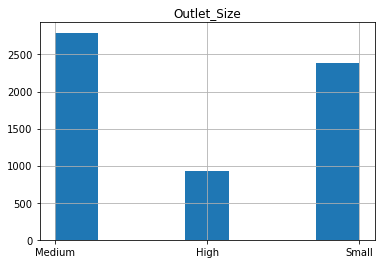

In [15]:
train['Outlet_Size'].hist(bins= 7)
plt.title("Outlet_Size")

Text(0.5, 1.0, 'Outlet_Location_Type')

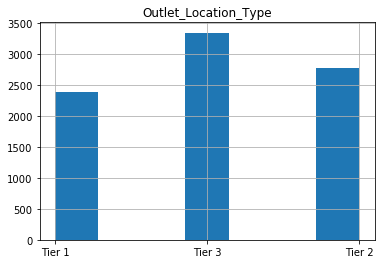

In [16]:
train['Outlet_Location_Type'].hist(bins= 7)
plt.title("Outlet_Location_Type")

([<matplotlib.axis.XTick at 0x2d411419eb8>,
 <a list of 4 Text xticklabel objects>)

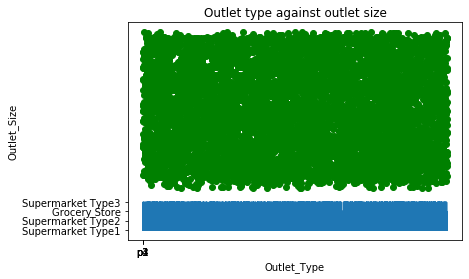

In [47]:
plt.plot(train["Outlet_Type"])
plt.plot(train["Item_Weight"], 'go')
plt.title("Outlet type against outlet size")
plt.xlabel("Outlet_Type")
plt.ylabel("Outlet_Size")
plt.xticks(ticks=[0,1,2,3], labels = ['p1','p2','p3','p4'])

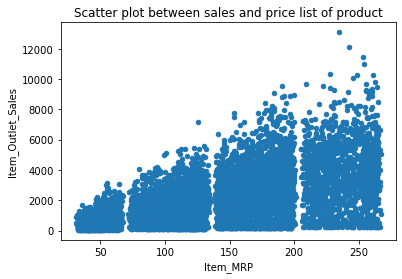

In [17]:
,# Draw a scatter plot

train.plot.scatter(x='Item_MRP', y='Item_Outlet_Sales', title= "Scatter plot between sales and price list of product");

plt.show(block=True);

We can see from the plot above that there is a positive correlation between the weight of the items and its MRP. This indicates that the higher the Maximum Retail Price (list price) of the product, the higher the sales for that outlet.

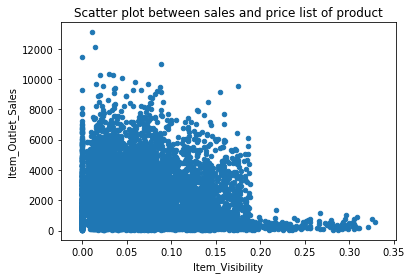

In [785]:
train.plot.scatter(x='Item_Visibility', y='Item_Outlet_Sales', title= "Scatter plot between sales and price list of product");

plt.show(block=True);

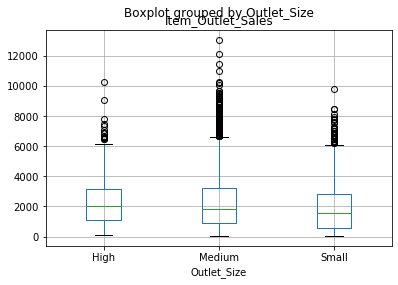

In [733]:
train.boxplot(column='Item_Outlet_Sales',by = 'Outlet_Size')

In [734]:
def out(a):
    for item in train['Item_Outlet_Sales']:
        if item > 10000:
            outlier = print(item)

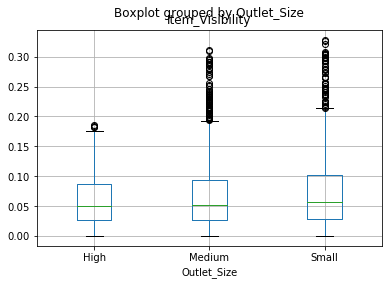

In [735]:
train.boxplot(column='Item_Visibility',by = 'Outlet_Size')

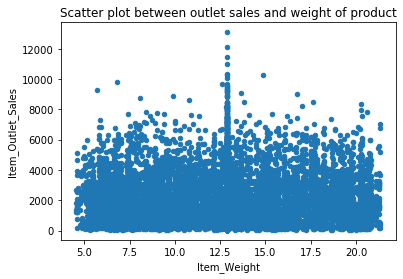

In [736]:
# Draw a scatter plot

train.plot.scatter(x='Item_Weight', y='Item_Outlet_Sales', title= "Scatter plot between outlet sales and weight of product");

plt.show(block=True);

We can see from the plot above that there is no relationship between the weight of the items and the outlet sales.

In [737]:
lb = LabelEncoder()
train["Outlet_Types"] = lb.fit_transform(train["Outlet_Type"])
train["Item_Types"] = lb.fit_transform(train["Item_Type"])
train["Outlet_Sizes"] = lb.fit_transform(train["Outlet_Size"])
train["Item_Fat_Contents"] = lb.fit_transform(train["Item_Fat_Content"])
train["Outlet_Location_Types"] = lb.fit_transform(train["Outlet_Location_Type"])

'Outlet_Location_Type'

'Outlet_Location_Type'

In [738]:
train.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15     9.300000          Low Fat         0.016047   
1              DRC01     5.920000          Regular         0.019278   
2              FDN15    17.500000          Low Fat         0.016760   
3              FDX07    19.200000          Regular         0.000000   
4              NCD19     8.930000          Low Fat         0.000000   
5              FDP36    10.395000          Regular         0.000000   
6              FDO10    13.650000          Regular         0.012741   
7              FDP10    12.857645          Low Fat         0.127470   
8              FDH17    16.200000          Regular         0.016687   
9              FDU28    19.200000          Regular         0.094450   
10             FDY07    11.800000          Low Fat         0.000000   
11             FDA03    18.500000          Regular         0.045464   
12             FDX32    15.100000          Regu

In [773]:
#splitting into training and cv for cross validation
X = train.loc[:,["Outlet_Types","Item_MRP","Item_Visibility",'Outlet_Location_Types',"Item_Types","Outlet_Establishment_Year","Outlet_Sizes"]]
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)

In [774]:
lreg = LinearRegression()

In [775]:
# training the model
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [776]:
pred = lreg.predict(x_cv)

In [777]:
mse = np.mean((pred - y_cv)**2)
mse

1491230.1344894567

In [778]:
lreg.score(x_cv,y_cv)

0.5203978471685309

In [779]:
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_) 
coeff

,0,Coefficient Estimate
0,Outlet_Types,990.397067
1,Item_MRP,15.325879
2,Item_Visibility,-1207.572359
3,Outlet_Location_Types,-436.689811
4,Item_Types,-1.867439
5,Outlet_Establishment_Year,2.750580
6,Outlet_Sizes,-340.512615


Text(0.5, 1.0, 'Residual plot')

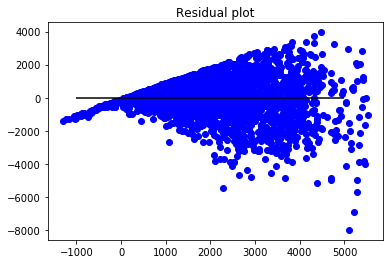

In [780]:
# residual plot 
x_plot = plt.scatter(pred, (pred - y_cv), c='b') 
plt.hlines(y=0, xmin= -1000, xmax=5000) 
plt.title('Residual plot')

In [781]:
predictors = x_train.columns 

In [782]:
coef = Series(lreg.coef_,predictors).sort_values() 

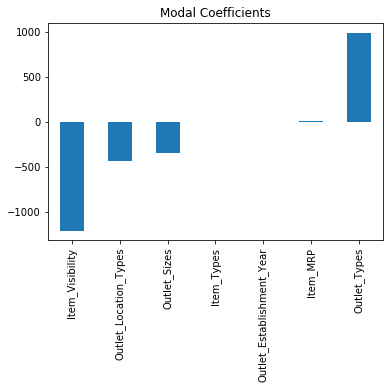

In [784]:
coef.plot(kind='bar', title='Modal Coefficients')